# Machine Learning on Kamenrider classification

## Libraries

In [74]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from PIL import Image 
import matplotlib.pyplot as plt
import random

import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras import layers


## Load in Dataset

In [49]:
def load_data(path):
    '''
    Load the dataset from the provided path.
    This will return a numpy array with paired images and class labels.
    '''
    # initialize the dataset to be filled
    X_data = []
    Y_data = np.array([])

    class_lab_int = -1  # class labels start at -1 and will increment

    # loop over all class-specific directories in the path parameter
    for directory in os.listdir(path):
        # record the class label as the directory name
        directory_path = os.path.join(path, directory)
        class_label = os.path.basename(directory_path)
        class_lab_int += 1  # increment class label for each directory

        # loop over files in class-specific directory
        for file in os.listdir(directory_path):
            file_path = os.path.join(directory_path, file)
            try:
                # Open and verify that it's an image file
                img = Image.open(file_path)
                img.verify()  # Verify that this is a valid image file
                img = Image.open(file_path)  # Reopen the file after verification

                # Convert the image to RGB to handle RGBA/other formats
                img = img.convert('RGB')

                # Resize the image to (244, 244) pixels
                sized_img = img.resize((244, 244))

                # Convert the resized image to a numpy array
                img_as_array = np.asarray(sized_img)

                # append image and label to dataset
                X_data.append(img_as_array)
                Y_data = np.append(Y_data, int(class_lab_int))

            except (IOError, ValueError) as e:
                print(f"Error processing file {file_path}: {e}")
                
                # Remove the corrupted file
                try:
                    os.remove(file_path)
                    print(f"Removed corrupted file: {file_path}")
                except OSError as remove_error:
                    print(f"Error removing file {file_path}: {remove_error}")
                continue  # Skip to the next file if there's an issue


    # Convert X_data to a numpy array
    X_data = np.array(X_data)

    return X_data, Y_data

In [50]:
# Directory where the images are stored (organized by class)
dataset_dir = "../kamen_rider_dataset"

In [51]:
dataset = load_data('../kamen_rider_dataset')

Error processing file ../kamen_rider_dataset/Kamen_Rider_555/.ipynb_checkpoints: [Errno 21] Is a directory: '/home/ng_royce/kamen-rider/kamen_rider_dataset/Kamen_Rider_555/.ipynb_checkpoints'
Error removing file ../kamen_rider_dataset/Kamen_Rider_555/.ipynb_checkpoints: [Errno 21] Is a directory: '../kamen_rider_dataset/Kamen_Rider_555/.ipynb_checkpoints'
Error processing file ../kamen_rider_dataset/Shin_Kamen_Rider_Prologue/.ipynb_checkpoints: [Errno 21] Is a directory: '/home/ng_royce/kamen-rider/kamen_rider_dataset/Shin_Kamen_Rider_Prologue/.ipynb_checkpoints'
Error removing file ../kamen_rider_dataset/Shin_Kamen_Rider_Prologue/.ipynb_checkpoints: [Errno 21] Is a directory: '../kamen_rider_dataset/Shin_Kamen_Rider_Prologue/.ipynb_checkpoints'
Error processing file ../kamen_rider_dataset/Kamen_Rider_Agito/.ipynb_checkpoints: [Errno 21] Is a directory: '/home/ng_royce/kamen-rider/kamen_rider_dataset/Kamen_Rider_Agito/.ipynb_checkpoints'
Error removing file ../kamen_rider_dataset/Kamen

In [52]:
# Initialize lists to store image data and labels
image_data = []
labels = []

In [53]:
X_data, Y_data = dataset

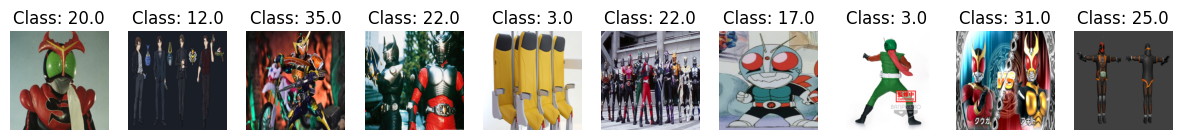

In [54]:
# Function to display random images from the dataset
def show_sample_images(X_data, Y_data, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        idx = random.randint(0, len(X_data) - 1)
        image = X_data[idx]
        label = Y_data[idx]
        axes[i].imshow(image)
        axes[i].set_title(f"Class: {label}")
        axes[i].axis('off')
    plt.show()

# Assuming X_data and Y_data are loaded correctly from the dataset
show_sample_images(X_data, Y_data, num_images=10)

In [66]:
# Assuming you already have X_data (input) and Y_data (labels)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_data, Y_data, test_size=0.2, random_state=42
)

In [13]:
# # Assuming X_data is your image data and Y_data are the labels
# X_data = np.array(X_data)  # Make sure X_data is a numpy array
# Y_data = np.array(Y_data)  # Make sure Y_data is a numpy array


In [14]:
# # Flatten each image to a 1D vector (128*128 = 16,384 pixels)
# X_data_flattened = [img.flatten() for img in X_data]

# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X_data_flattened, Y_data, test_size=0.2, random_state=42)

# # Convert to numpy arrays
# X_train = np.array(X_train)
# X_test = np.array(X_test)


In [15]:
# # Print the shapes of the splits to verify
# print(f"Training data shape: {X_train.shape}, Training labels shape: {Y_train.shape}")
# print(f"Test data shape: {X_test.shape}, Test labels shape: {Y_test.shape}")

# Training 

## SVM

In [11]:

# # Initialize the SVM model
# svm_classifier = svm.SVC(kernel='linear')  # You can try 'rbf', 'poly', etc. for the kernel

# # Train the model
# svm_classifier.fit(X_train, Y_train)

# # Predict on the test data
# Y_pred = svm_classifier.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(Y_test, Y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")

# # Display detailed classification report
# print("\nClassification Report:")
# print(classification_report(Y_test, Y_pred))


In [12]:
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Test Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));
    
    # mins = numpy.min(X_train, 0)
    # maxs = numpy.max(X_train, 0)
    # xx, yy = numpy.meshgrid(numpy.arange(mins[0], maxs[0], 0.025),
    #                  numpy.arange(mins[1], maxs[1], 0.025))

    # Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()])
    # Z = Z.reshape(xx.shape)

    # ax = fig.add_subplot(1, 3, 3)
    # ax.contourf(xx, yy, Z, alpha=0.4)
    # ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, edgecolor='k')

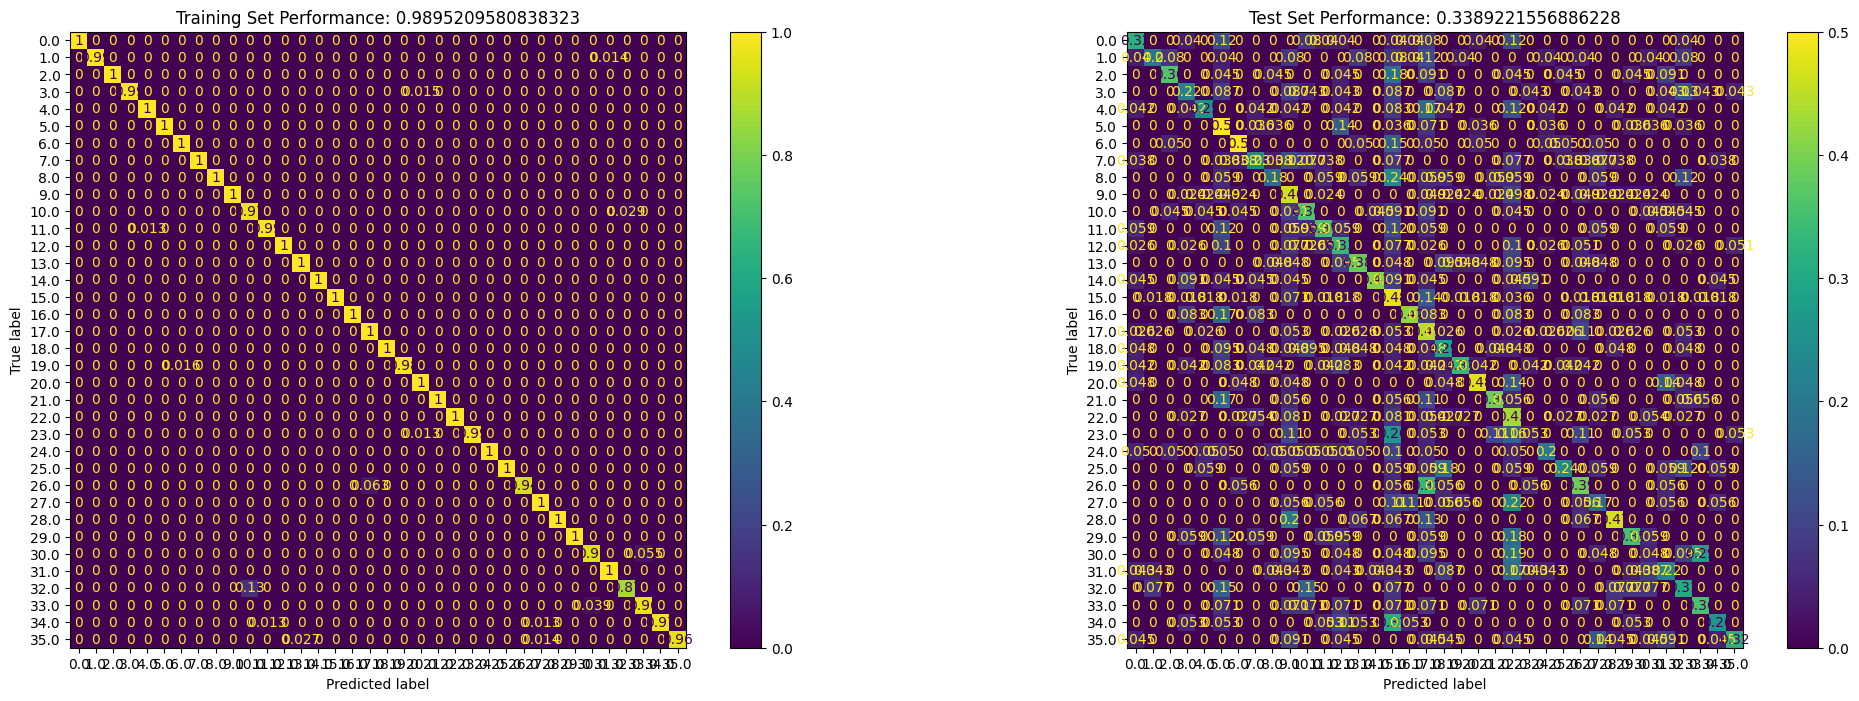

In [13]:
svm = SVC(C=1.0, kernel='linear')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

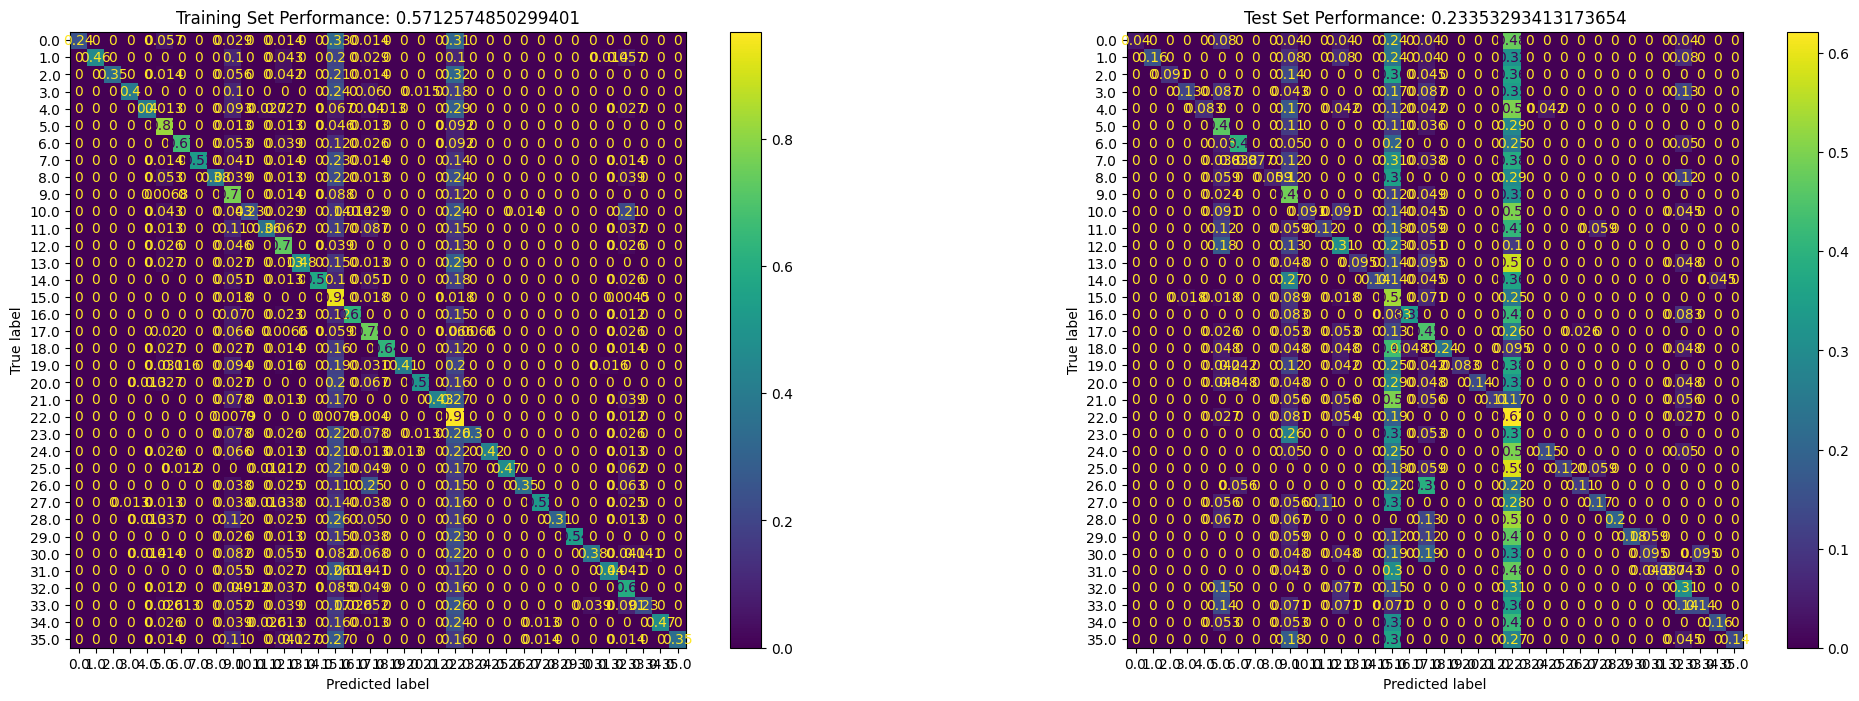

In [14]:
svm = SVC(C=1.0, kernel='rbf')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

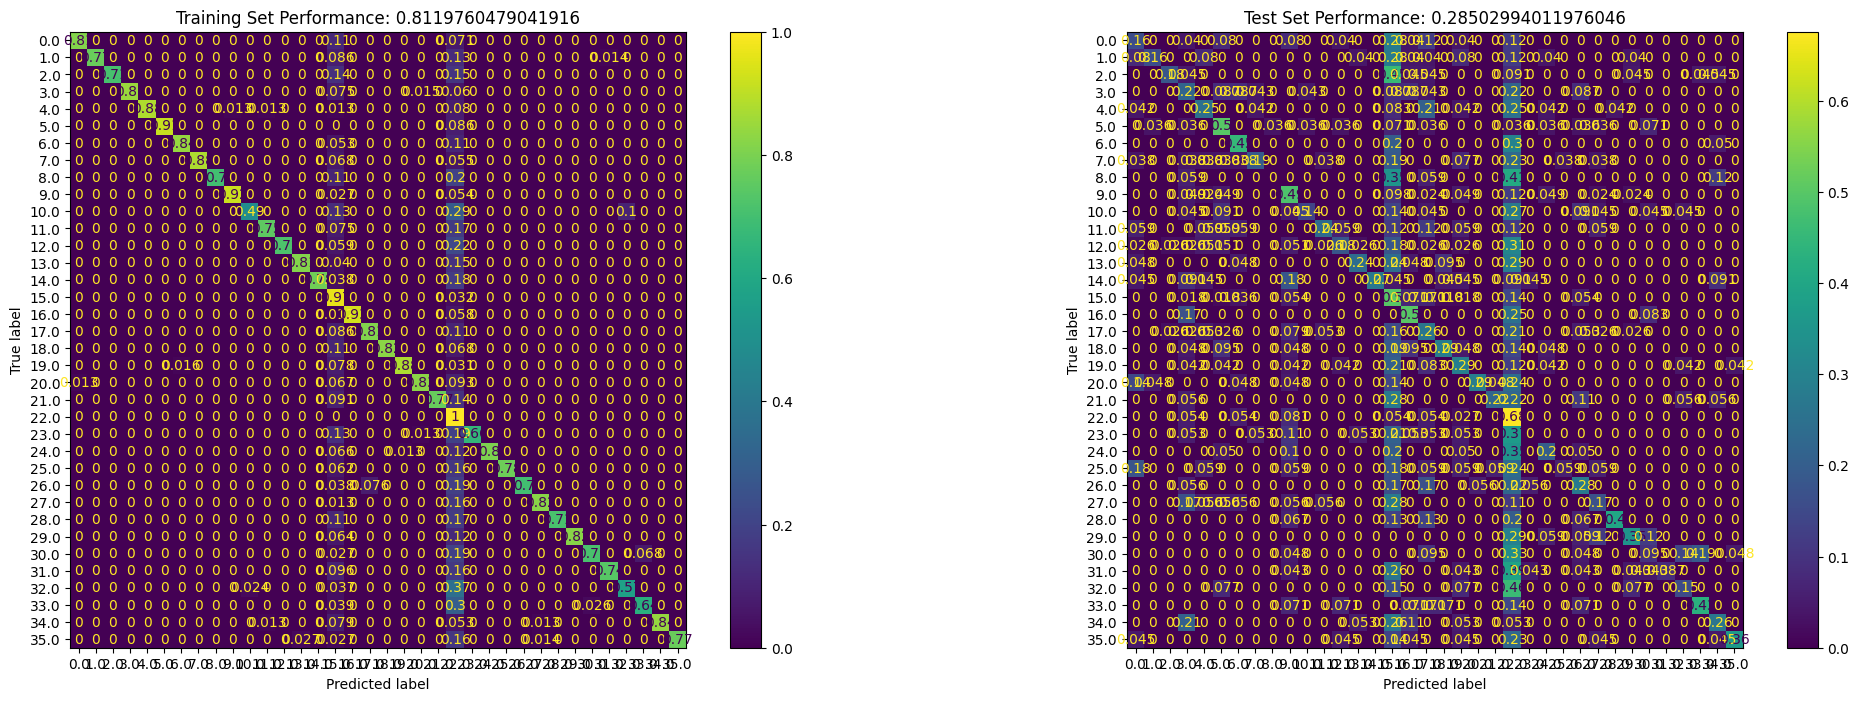

In [15]:
svm = SVC(C=1.0, kernel='poly')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

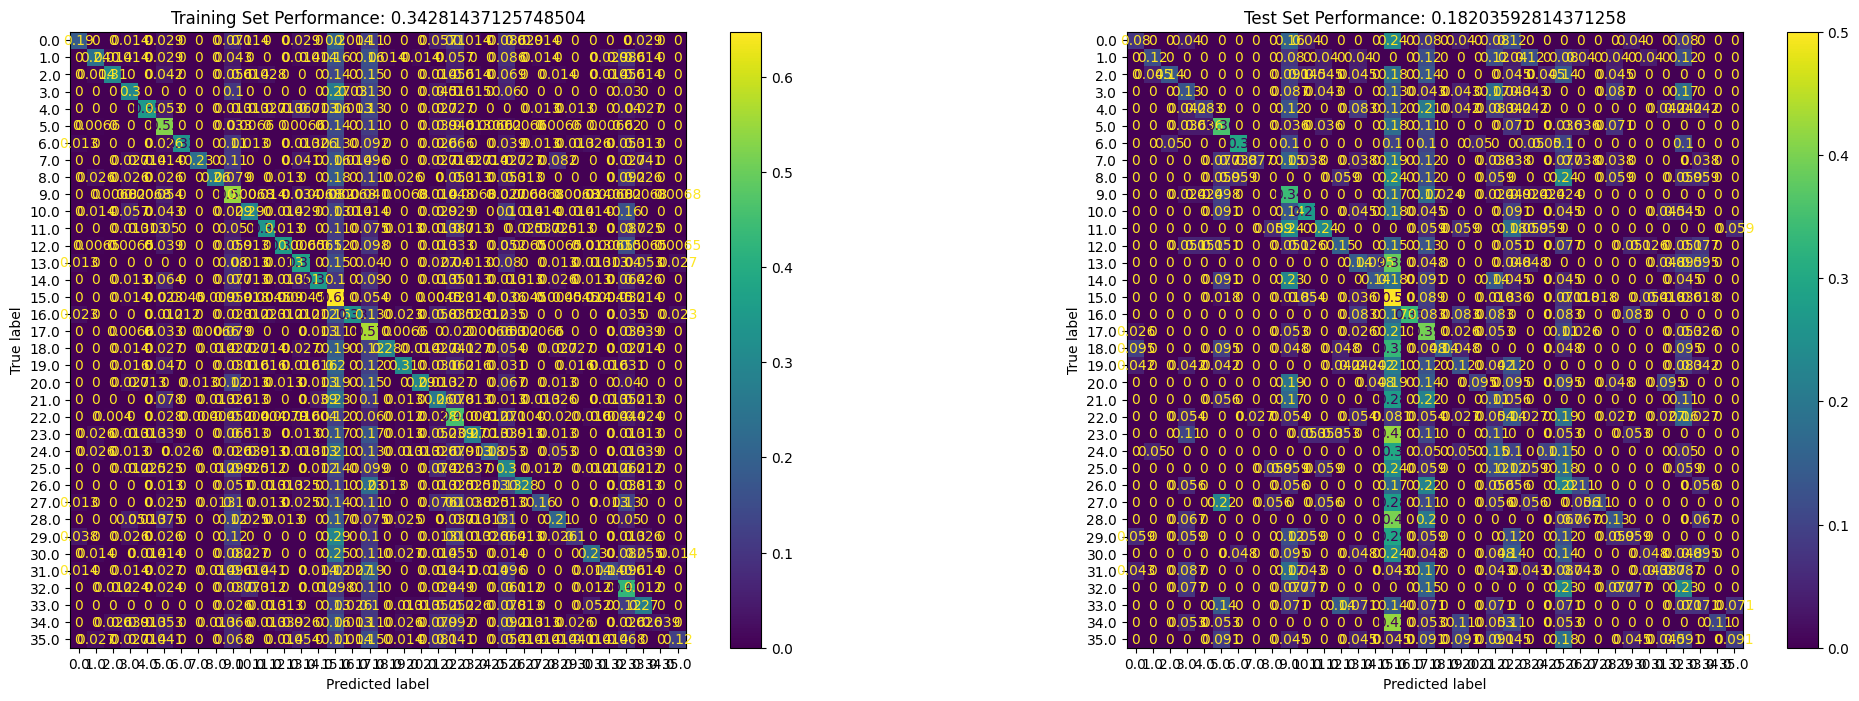

In [16]:
cknn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

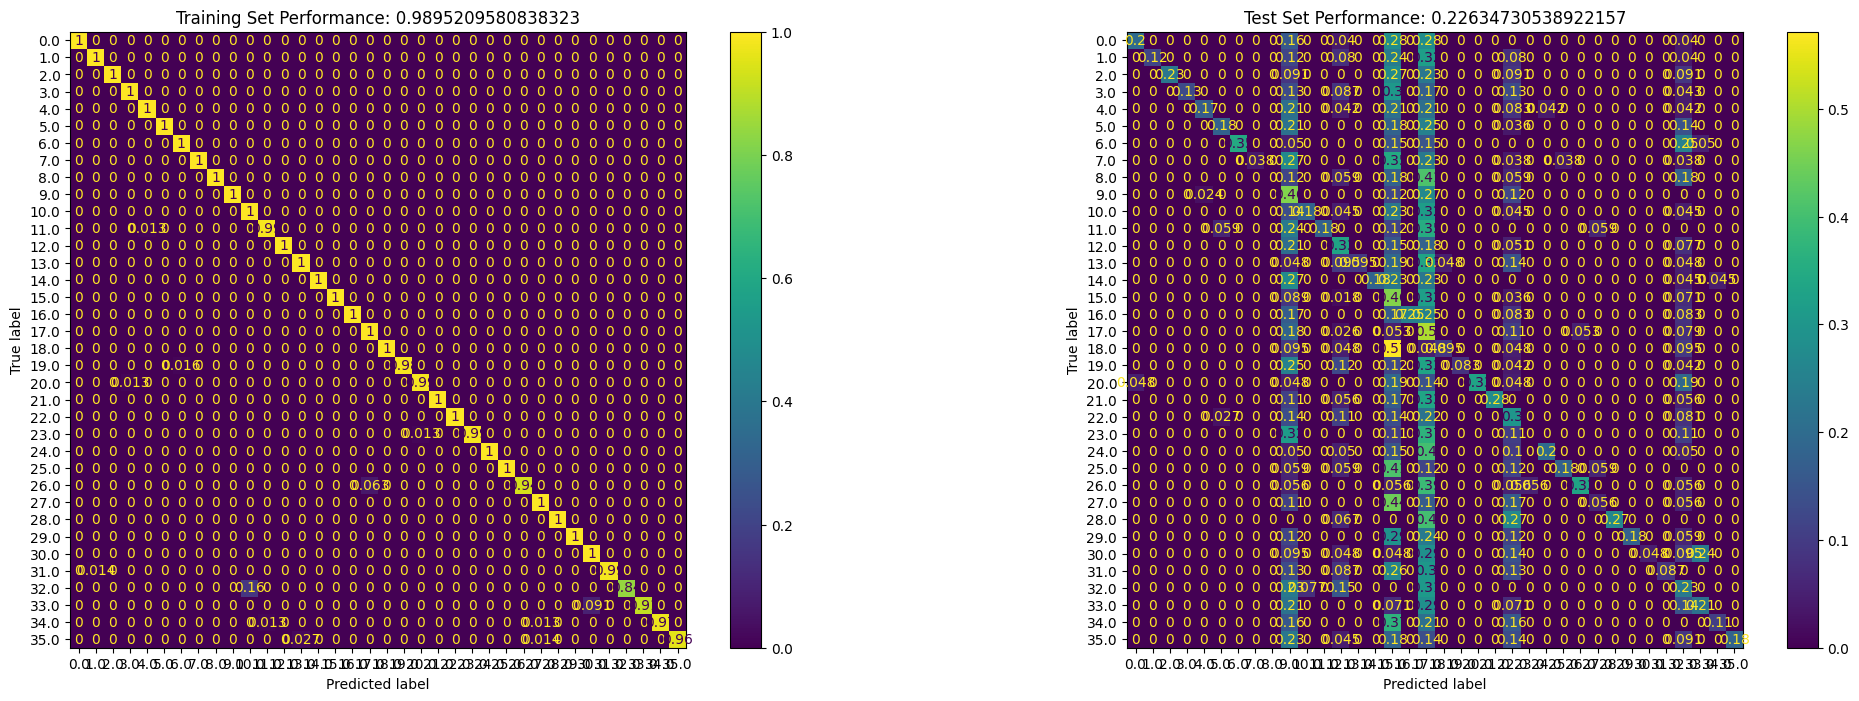

In [17]:
cknn = KNeighborsClassifier(n_neighbors=350, weights='distance')
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

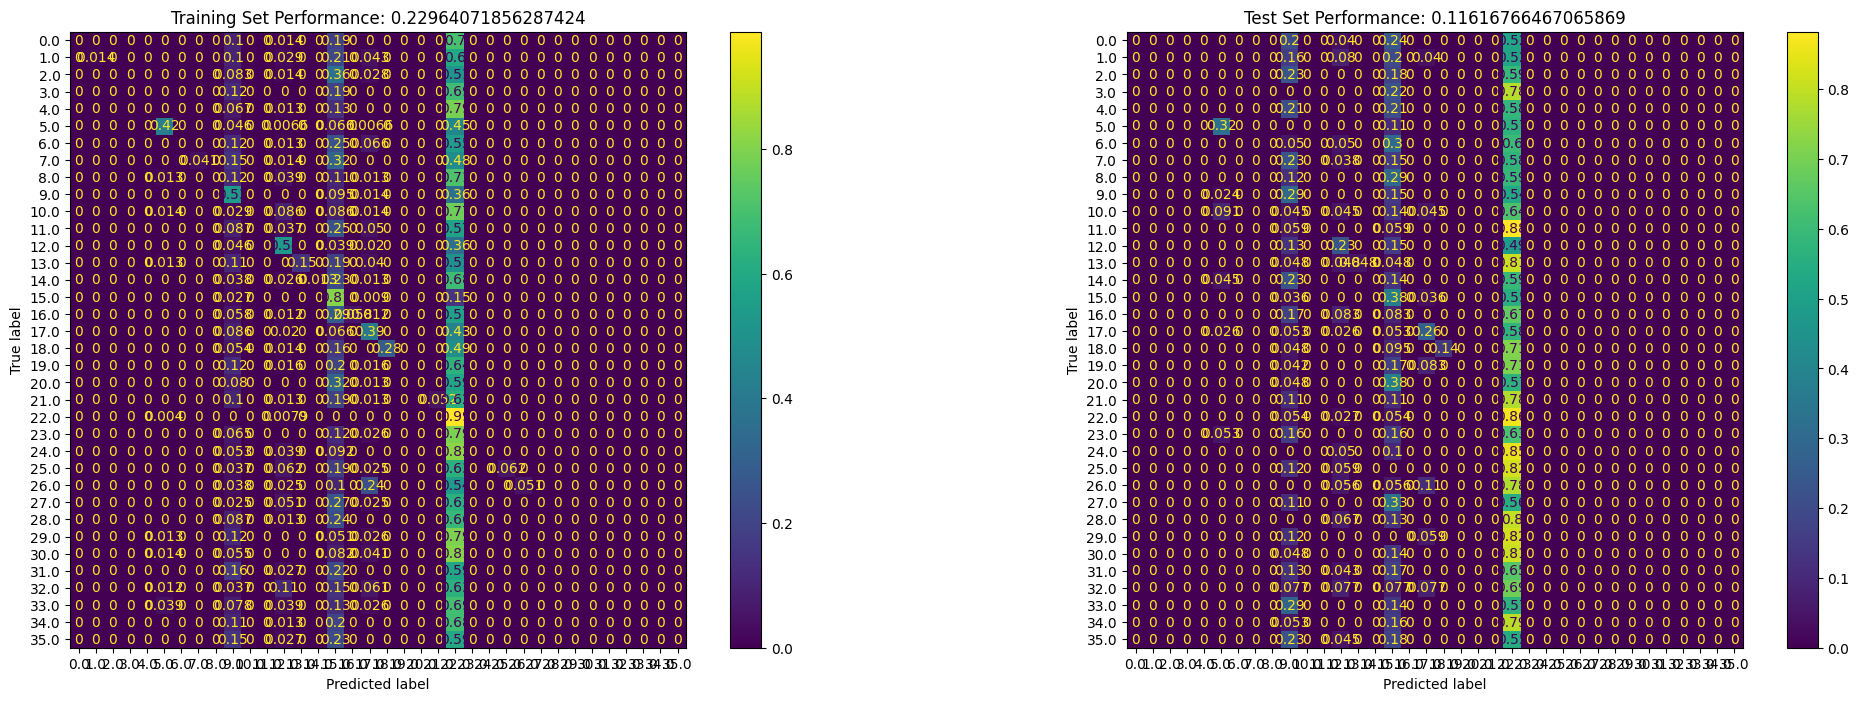

In [18]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

## Deep Learning 

### Resize Data 

In [ ]:
def plot_training(history):
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend();    

In [ ]:
# our input now has a different shape, 64x64x1, as we have 64x64 single channel images
inputs = keras.Input(shape=(244, 244, 3, ), name='img')
# rather than use a fully connected layer, we'll use 2D convolutional layers, 8 filters, 3x3 size kernels
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu')(inputs)
# 2x2 max pooling, this will downsample the image by a factor of two
x = layers.MaxPool2D(pool_size=(2, 2))(x)
# more convolution, 16 filters, followed by max poool
x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
# final convolution, 32 filters
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
# a flatten layer. Matlab does a flatten automatically, here we need to explicitly do this. Basically we're telling
# keras to make the current network state into a 1D shape so we can pass it into a fully connected layer
x = layers.Flatten()(x)
# a single fully connected layer, 64 inputs
x = layers.Dense(64, activation='relu')(x)
# and now our output, same as last time
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print the summary
model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_cnn_model')
model_cnn.summary()

In [ ]:
print(type(X_data), X_data.shape)

In [ ]:
model_cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'], jit_compile=False)
history = model_cnn.fit(X_data, Y_data,
                        batch_size=64,
                        epochs=30,
                        validation_data=(X_test, Y_test))

In [ ]:
plot_training(history)

In [ ]:
def eval_model(model, history, x_test, y_test):
    test_scores = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', test_scores[0])
    print('Test accuracy:', test_scores[1])

    pred = model.predict(x_test, verbose=False);
    indexes = keras.ops.argmax(pred, axis=1)
    
    cm = confusion_matrix(y_test, indexes)
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=range(36))
    c.plot(ax = ax)
    
    print(classification_report(y_test, indexes))

    fig = plt.figure(figsize=[8, 4])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(history['loss'], label='Training Loss')
    ax.plot(history['accuracy'], label='Training Accuracy')
    ax.plot(history['val_loss'], label='Validation Loss')
    ax.plot(history['val_accuracy'], label='Validation Accuracy')
    ax.set_xlabel('Training Epochs')
    ax.set_ylabel('Accuracy or Loss')
    ax.legend()


In [ ]:
eval_model(model_cnn, history.history, X_test, Y_test)